Shyam Kumar Ray Yadav (18449154)

Sonu Kumar (15651099)

Ahmad Raza Khawaja (25848862)

# Problem Sheet 6

## Exercise 6.1: dimensionality reduction on histograms.

The file ```hist.npz``` contains a small histogram dataset of 199 histograms with labels. The key ```data``` contains the normalized histograms, the key ```labels``` contains the binary labels (0 or 1), the key ```binspec``` contains the boundaries of the histogram bins. Analyze this dataset with PCA, as discussed in the lecture. Use both the standard Euclidean metric and the inverse cumulative distribution transform for the analysis an compare the results. Concretely, proceed as follows:


#### 1. Import the histograms and visualize them with their labels.

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [115]:
#Loading Data
histdata = np.load('hist.npz')

histograms =histdata['data']
labels = histdata['labels']
binspec = histdata['binspec']
print(histograms)
print('\n',labels)
print("\n", binspec)
print("\nThe shape of the histograms:", histograms.shape)
print("The shape of label is",labels.shape)
print("The shape of binspec is",binspec.shape)


[[0.15539305 0.12065814 0.08409506 ... 0.         0.         0.        ]
 [0.15959821 0.12723214 0.11607143 ... 0.         0.         0.00111607]
 [0.15512048 0.12650602 0.10240964 ... 0.00150602 0.         0.00301205]
 ...
 [0.16039604 0.07722772 0.0950495  ... 0.01188119 0.0039604  0.        ]
 [0.2026749  0.10288066 0.11728395 ... 0.         0.         0.00102881]
 [0.19264069 0.0952381  0.08874459 ... 0.0021645  0.         0.        ]]

 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

 [0.   0.12 0.24 0.36 0.48 0.6  0.72 0.84 0.96 1.08 1.2  1.32 1.44 1.56
 1.68 1.8  1.92 2.04 2.16 2.28 2.4  2.52 2.64 2.76 2.88 3.  ]

The shape of 

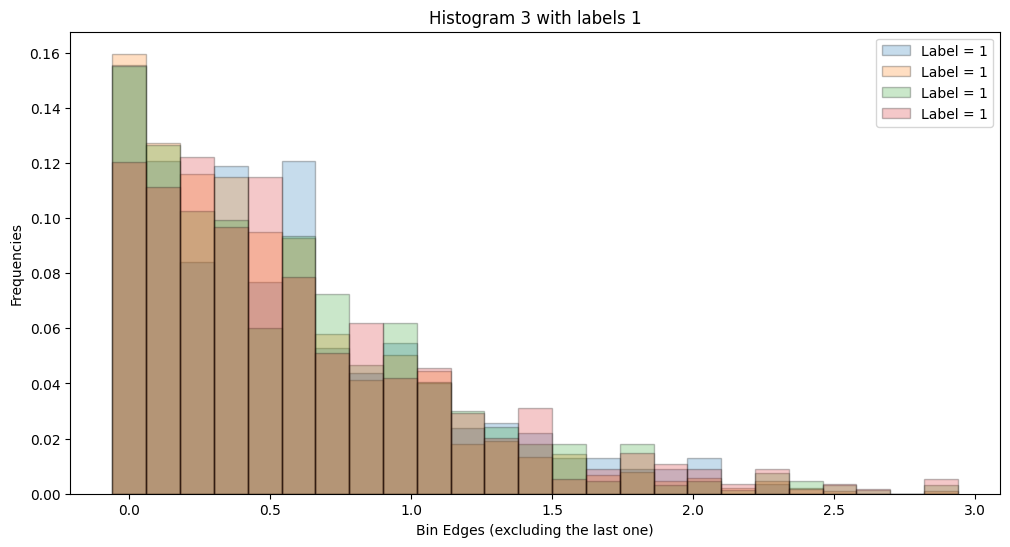

In [99]:
#Visualizing the few histograms with their labels.
plt.figure(figsize = (12,6))
for i in range (4):
    #Plotting the histogram exluding the last element from binspec i.e.25
    plt.bar(binspec[:-1], histograms[i], width = np.diff(binspec), edgecolor ='black',  alpha = 0.25, label = f'Label = {labels[i]}')
    plt.title(f"Histogram {i} with labels {labels[i]}")
    plt.xlabel("Bin Edges (excluding the last one)")
    plt.ylabel("Frequencies")
    plt.legend()
    # plt.show()



#### 2. Apply PCA to the histograms, show the spectrum of eigenvalues, and plot their embedding obtained by projection onto the first two eigenvectors with label information. Do the two classes appear to be different?


In [134]:
#Flatten the histogram and convert it from 3D to 2D for applying PCA
histograms_flat = histograms.reshape(histograms.shape[0], -1)
print("The shape of flattened histogram is :", histograms_flat.shape)
print(histograms_flat)


The shape of flattened histogram is : (199, 25)
[[0.15539305 0.12065814 0.08409506 ... 0.         0.         0.        ]
 [0.15959821 0.12723214 0.11607143 ... 0.         0.         0.00111607]
 [0.15512048 0.12650602 0.10240964 ... 0.00150602 0.         0.00301205]
 ...
 [0.16039604 0.07722772 0.0950495  ... 0.01188119 0.0039604  0.        ]
 [0.2026749  0.10288066 0.11728395 ... 0.         0.         0.00102881]
 [0.19264069 0.0952381  0.08874459 ... 0.0021645  0.         0.        ]]


In [135]:
#Now, applying PCA onto the flatted data.
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(histograms_flat)
print(pca_result.shape)
print(pca_result)


(199, 2)
[[ 0.01152261  0.0031219 ]
 [-0.00343077 -0.01712504]
 [ 0.02127446  0.00592916]
 [ 0.03653997 -0.03193749]
 [-0.06167101  0.00217642]
 [-0.04461445  0.10571206]
 [ 0.01854354 -0.01783164]
 [-0.0018427   0.00317003]
 [-0.02057714  0.00076631]
 [ 0.0238906  -0.01305255]
 [ 0.06549031  0.00031799]
 [-0.03677096  0.03423398]
 [ 0.04784225 -0.02568591]
 [-0.02352363  0.02562191]
 [-0.02800672 -0.02453102]
 [ 0.00156241 -0.02560441]
 [-0.04466307 -0.0124441 ]
 [ 0.05584268 -0.04227885]
 [-0.00223767  0.00362218]
 [ 0.01651198  0.00684   ]
 [ 0.04152836 -0.00390239]
 [-0.0550751   0.01602695]
 [ 0.02877819  0.02872553]
 [-0.03790794  0.00465996]
 [ 0.02819778  0.04242003]
 [ 0.02758397 -0.02037384]
 [ 0.08555033  0.00973722]
 [ 0.0568951  -0.01342627]
 [-0.01671043 -0.00887339]
 [ 0.02977495  0.00979077]
 [ 0.02304149 -0.02861626]
 [-0.0179574  -0.00822295]
 [-0.00102734  0.01837192]
 [-0.03260369 -0.04721686]
 [ 0.00662514 -0.01613478]
 [-0.022814    0.01057408]
 [ 0.03098776 -0.02

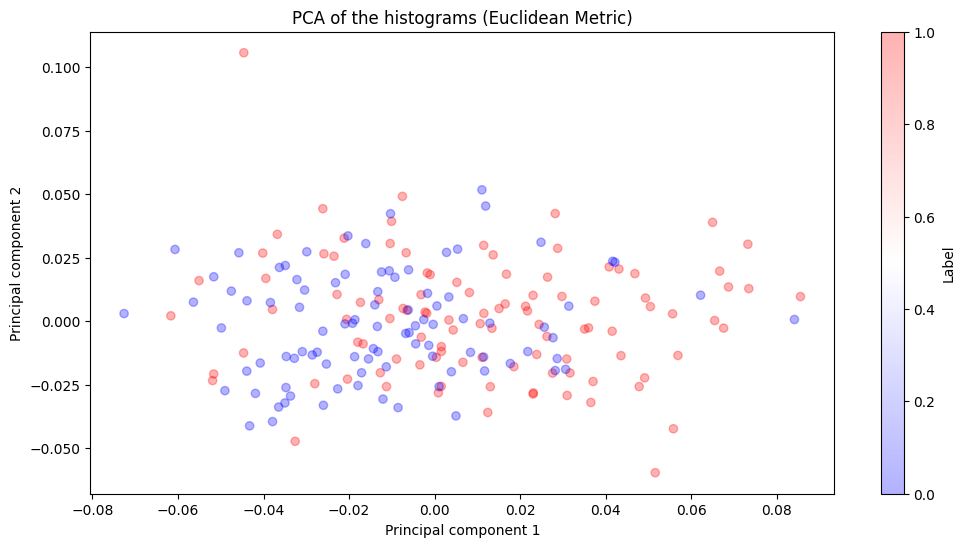

In [136]:
#Plotting the PCA results
plt.figure(figsize = (12,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap = 'bwr', alpha = 0.3)
plt.title("PCA of the histograms (Euclidean Metric)")
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.colorbar(label = 'Label')
plt.show()

After applying PCA analysis, we can see that:
- Yes, the two classes do appear to be different overall, as indicated by the distinct clusters formed by the majority of the data points.
- However, the overlap shows that the separation is not perfect, implying that some instances of the two classes share common features or that additional factors (dimensions) may be needed to achieve complete separation.


#### 3. Apply the inverse cumulative distance transform as in the lecture and repeat the same steps as above. How does the spectrum change?

In [163]:
#Applying inverse cumulatvive distance transform

from scipy.stats import norm

histograms_transformed = np.zeros_like(histograms) #Initializing the histograms for the similar dimensionality. 
print("Also, the shape of transformed histogram should be:", histograms_transformed.shape)

#For cdf, we sum all the elements along the row.
for i in range(histograms.shape[0]):
    # uniform_cdf = np.linspace(0, 1, len(histograms))
    # transformed_histograms[i] = np.interp(cdf, uniform_cdf, histograms)
    cdf = np.cumsum(histograms[i])
    cdf = np.clip(cdf, 1e-10, 1 - 1e-10) #Avoid issues with 0 and 1 by clipping values
    histograms_transformed[i]= norm.ppf(cdf)

#Now, again repeating the above steps. 
histograms_transformed_flattened = histograms_transformed.reshape(histograms_transformed.shape[0], -1)
print("The shape of the flattened transformed histogram: ", histograms_transformed_flattened.shape)

pca_transformed = PCA(n_components = 2)
pca_transformed_result = pca_transformed.fit_transform(histograms_transformed_flattened)
print("The shape of PCA_transformed histogram after iCDF:", pca_transformed_result.shape)
print("\nThe result of PCA applied on flattened inverse cumulative distance transfromed histogram: \n", pca_transformed_result )

    

Also, the shape of transformed histogram should be: (199, 25)
The shape of the flattened transformed histogram:  (199, 25)
The shape of PCA_transformed histogram after iCDF: (199, 2)

The result of PCA applied on flattened inverse cumulative distance transfromed histogram: 
 [[ 6.50217046e+00 -2.45350761e+00]
 [-3.16729145e-01 -8.99880652e-01]
 [-1.17185507e+00 -4.41762154e-01]
 [-1.58592284e+00 -3.18522502e-01]
 [ 6.27201748e+00 -2.28222967e+00]
 [ 5.92638413e+00 -1.71363704e+00]
 [-2.03483609e+00 -1.18929665e-01]
 [ 1.18738656e+00  2.12891803e+00]
 [ 3.47418099e+00  8.94491737e-01]
 [-2.20410011e+00  1.77877241e-01]
 [-1.76831468e+00  1.63397354e-01]
 [-4.26694835e-01 -9.32994949e-01]
 [-1.27500411e+00 -2.41824640e-01]
 [-1.32380961e+00 -5.88970588e-01]
 [ 6.13907518e+00 -2.09023075e+00]
 [ 3.66848994e+00  6.64367602e-01]
 [-4.33716957e-01 -7.76609020e-01]
 [-1.64610790e+00 -5.37196835e-01]
 [-5.87839948e-01 -7.17646996e-01]
 [-9.30217961e-01 -2.21001958e-01]
 [-1.28244759e+00  7.242

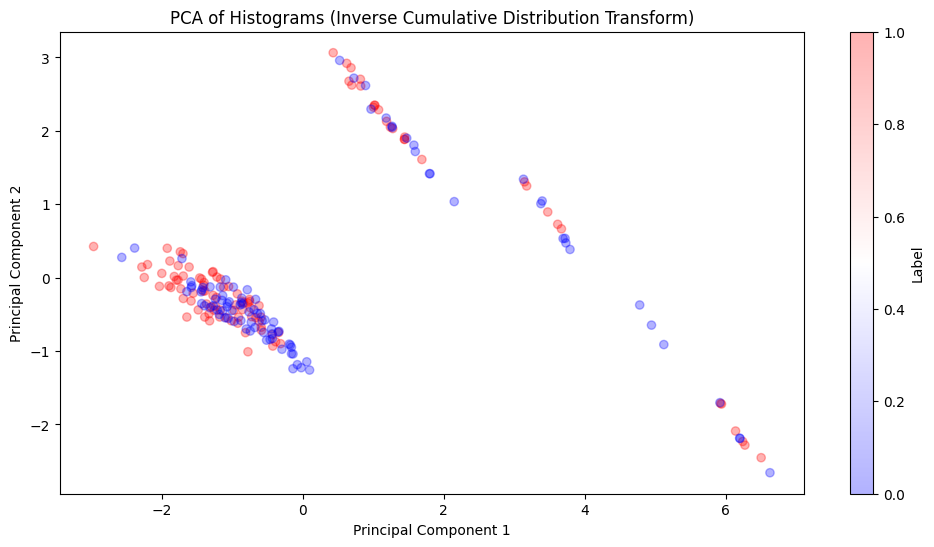

In [164]:
plt.figure(figsize = (12,6))
plt.scatter(pca_transformed_result[:, 0], pca_transformed_result[:, 1], c = labels, cmap = 'bwr', alpha = 0.3)
plt.title('PCA of Histograms (Inverse Cumulative Distribution Transform)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label')
plt.show()

The spectrum here seems to change drastically. 

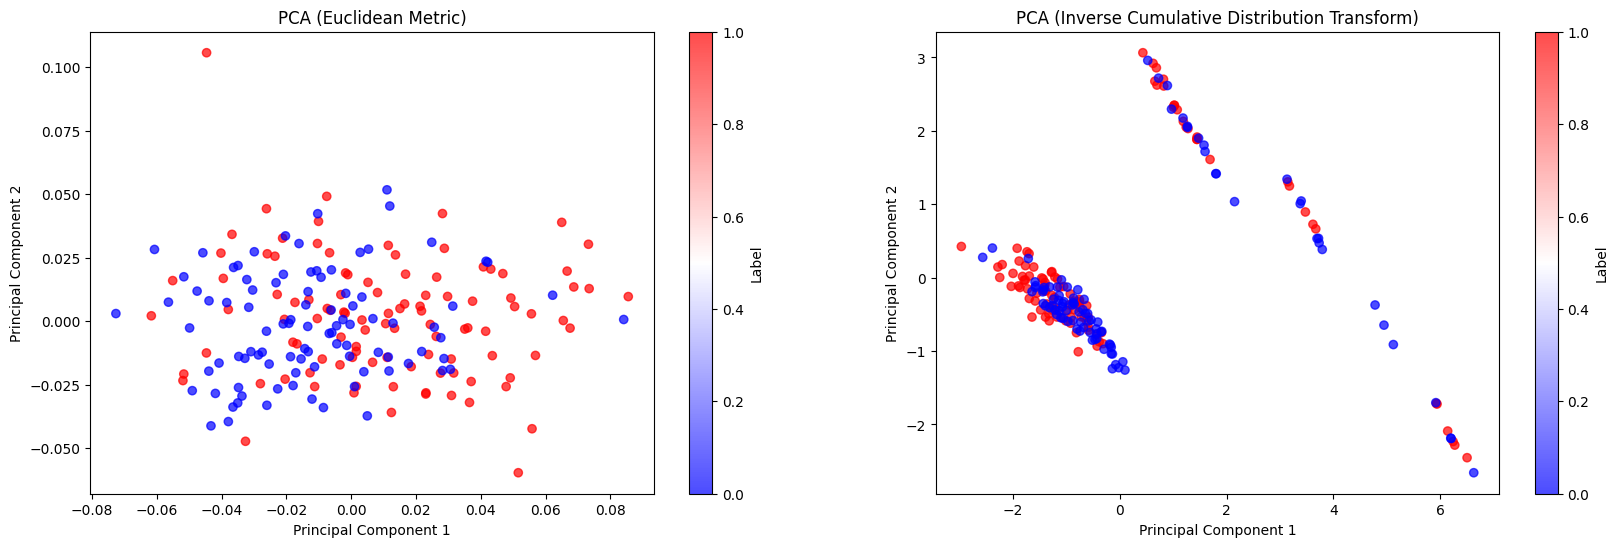

In [165]:
# Comparison between the changes in the histogram. 


#### 4. For both versions of the data, visualize the change of histograms corresponding to moving along the first PCA direction by one standard deviation. Briefly describe the induced change in the histograms.